## Оценка вероятностей в задаче классификации

In [1]:
from classification_helper import *
import numpy as np

В предыдущем уроке мы научились предсказывать метку класса, как знак от произведения вектора признаков на вектор весов:
\begin{equation*}
\tilde{y} = sign(\sum_{i=1}^N \theta_ix_i) = sign(X\Theta)
\end{equation*}

Мы узнали, что линейный классификатор строит разделяющую гиперплоскость в пространстве признаков:
\begin{equation*}
X\Theta = 0
\end{equation*}

НО! Мы учитывали только $sign(X\Theta)$

* Если $X\Theta > 0$, мы относили к классу 1,


* Если $X\Theta < 0$, относили к классу -1

Никак не учитывали то, насколько далеко объект попал от разделяющей гиперплоскости. А это достаточно важный параметр.

Кажется, что должна быть следующая логика:

* Если объект $X$ близко к разделяющей гиперплоскости, значит классификация не уверенная.

* Если $X$ далеко, то классификаия уверенная.

Как определить расстояние от точки до разделяющей гиперплоскости?

**Расстояние от точки до гиперплоскости**:

Пусть дана точка $M^* = (m_1^*, m_2^*)$.

Расстояние $d$ от прямой $\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$ до точки $M^*$ считается по формуле:

\begin{equation*}
d=\dfrac{|\theta_0 + \theta_1m_1^* + \theta_2m_2^*|}{\sqrt{\theta_1^2 + \theta_2^2}} \\
d = \dfrac{M^*\Theta}{\|\Theta\|}
\end{equation*}

<details>
<summary>Вывод формулы расстояния от точки до гиперплоскости</summary>
<p>

Длина ортогональной проекции вектора $\overline{a}$ на вектор $\overline{b}$ считается по формуле:

\begin{equation*}
np_{\overline{b}}\overline{a} = \| \overline{a}\|cos(\widehat{ \overline{a},\overline{b}}) = \dfrac{(\overline{a}, \overline{b})}{\|\overline{b}\|}
\end{equation*}


Пусть требуется посчитать расстояние от точки $M^*$ до гиперплоскости.

Возьмем любую точку $M_0$ принадлежащую данной гиперплоскости.

Тогда расстояние от точки $M^*$ до гиперплоскости будет равно длине ортогональной проекции вектора $\overline{M_0M*}$ на вектор нормали $\overline{n}$.


\begin{equation*}
d = \dfrac{(M^* - M_0,\overline{n})}{\|\overline{n}\|} = \dfrac{(M^*,\overline{n})}{\|\overline{n}\|} - \dfrac{(M_0,\overline{n})}{\|\overline{n}\|} \\
d = \dfrac{(M^*,\overline{n}) + A_0}{\|\overline{n}\|} \\
\end{equation*}

![](gipyerploskostiM.jpg?raw=true)

</p>
</details> 

В наших обозначениях точкой является вектор признаков $X_i$, значит расстояние от вектора $X_i$ до разделяющей гиперплоскости будет равно:
\begin{equation*}
d = \dfrac{X_i\Theta}{\|\Theta\|}
\end{equation*}

Заметим, что произведение $X_i\Theta$ пропорцианально расстоянию от $i$-го объекта до разделяющей гиперплоскости, так как для всех объектов в выборке, вектор весов $\Theta$ одинаковый.
\begin{equation*}
d = \dfrac{X_i\Theta}{\|\Theta\|} \sim X_i\Theta
\end{equation*}

Действительно, чем больше по модулю $X_i\Theta$, тем дальше объект $X_i$ от разделяющей гиперплоскости:

In [2]:
visualize_classification()

interactive(children=(FloatSlider(value=0.0, description='$dx_1$, $dx_2$:', max=8.0, min=-2.0, step=0.415), Ou…

Значит для простоты мы можем использовать величину $X_i\Theta$, как меру расстояния от $X_i$ до разделяющей гиперплоскости.

Итак, 

* если $X_i\Theta$ по модулю большое, классификация уверенная

* если $X_i\Theta$ по модулю маленькое, классификация неуверенная

Как можно обозначать степень уверенности классификации?

Например вероятностью принадлежности к классам.

Давайте попробуем предсказть *вероятности принадлежности к каждому классу*

У нас всего два класса:
* iris setosa 
* iris virginica

Будем пробовать предсказывать вероятность принадлежности классу *iris virginica*:

\begin{equation*}
P(y_i=iris\_virginica|X_i)
\end{equation*}
Тогда
\begin{equation*}
P(y_i=iris\_setosa|X_i) = 1 - P(y_i=iris\_virginica|X_i)
\end{equation*}

Так как вероятности распределены от 0 до 1, давайте и истинные метки классов сделаем 0 и 1
 * iris setosa 0
 * iris virginica 1

In [3]:
X, kind_iris = get_data()

In [4]:
y = kind_iris.copy()
y[y=='iris setosa'] = 0
y[y=='iris virginica'] = 1
y = y.astype(int)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Тогда можем попробовать обучить линейную регрессию предсказывать вероятности:
\begin{equation*}
\Theta_{opt} = \operatorname*{argmin}_\Theta \sum_{i=1}^N(\theta_0 +  \theta_1x_{i,1} + \theta_2x_{i,2} - y_i)^2 = \operatorname*{argmin}_\Theta \sum_{i=1}^N (X_i\Theta - y_i)^2 \\
P(y_i=iris\_virginica|X_i) = X_i\Theta_{opt}
\end{equation*}

$X_i = \begin{pmatrix} 1&  x_{i,1} & x_{i,2}\end{pmatrix}$ - Вектор признаков $i$ - го объекта

$x_{i,1}$ - Длина чашелистика на $i$-ом объекте
 
$x_{i,2}$ - Ширина чашелистика на $i$-ом объекте
 
$y_i \in$ {0,1} - Истинная метка класса
 
$\Theta = \begin{pmatrix}\theta_0 &  \theta_1 & \theta_2\end{pmatrix}^T$- параметры модели (веса)


Тогда финальное решение о метке класса можно отбирать по порогу $p_0$:
\begin{equation*}
 y_i = 
 \begin{cases}
   iris\_virginica, &\text{$X_i\Theta \geqslant p_0$}\\
   iris\_setosa, &\text{$X_i\Theta < p_0$}\\
 \end{cases}
\end{equation*}

$p_0$ можно взять, например $p_0 = 0.5$

Но $X_i\Theta$ не обзятельно будет лежать в интервале $[0,1]$, $X_i\Theta \in \mathbb{R}$, это очень странно для вероятности.

Чтобы выход модели принимал непрерывное значение только в интервале $[0,1]$, можем взять функцию $f$ от выхода модели $X_i\Theta$:

\begin{equation*}
f: \mathbb{R}\rightarrow [0,1]\\
\tilde{y_i} = f(X_i\Theta)
\end{equation*}

Для подобных целей в машинном обучении принято брать функцию **сигмоида**:



\begin{equation*}
f(t) = \sigma(t) = \dfrac{1}{1+e^{-t}}
\end{equation*}


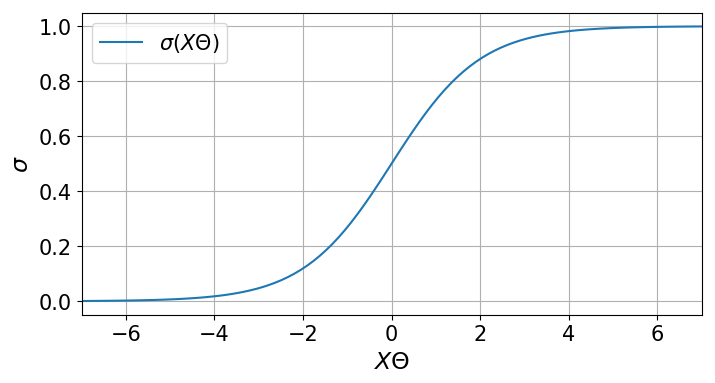

In [5]:
plot_sigmoid()

Тогда модель классификации примит следующий вид:
\begin{equation*}
P(y=iris\_virginica|X) = \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2)\\
P(y=iris\_virginica|X) = \sigma(X\Theta)= \dfrac{1}{1+e^{-X\Theta}} \\
y = 
 \begin{cases}
   iris\_virginica, &\text{$\sigma(X_i\Theta) \geqslant p_0$}\\
   iris\_setosa, &\text{$\sigma(X_i\Theta) < p_0$}\\
 \end{cases}
\end{equation*}


Обучим ее как линейную регрессию с функцией ошибки *MSE*:
\begin{equation*}
\Theta_{opt} = \operatorname*{argmin}_\Theta \sum_{i=1}^N(\sigma(\theta_0 +  \theta_1x_{i,1} + \theta_2x_{i,2}) - y_i)^2 = \\ =\operatorname*{argmin}_\Theta \sum_{i=1}^N (\sigma(X_i\Theta) - y_i)^2 \\
\end{equation*}

Вот теперь кажется, что все хорошо, но не совсем.

*MSE* хорошо оценивает среднее значение, для вероятностей это не совсем подходит.

Обозначим за $\tilde p(X)$ вероятность принадлежности к классу 1.

$\tilde p(X)=P(y=iris\_virginica|X) = \sigma(X\Theta) = \dfrac{1}{1+e^{-X\Theta}}$

Рассмотрим следующую функцию:
\begin{equation*}
L = \sum\limits_{i = 1}^N y_i\ln(\tilde p(X_i) + (1-y_i)\ln(1-\tilde p(X_i))
\end{equation*}

Замети, что чем ближе $\tilde p(X_i)$ к истиным ответам $y_i$, тем болеше значение $L$.

Обычно для обучения мы хотим минимизировать функцию ошибки, поэтому поставим знак минус перед $L$.

Пусть $\tilde L = -L$, тогда минимизируя $\tilde L$, будем максимизировать $L$.

\begin{equation*}
\tilde L = -L\\
\Theta_{opt} = \operatorname*{argmin}_\Theta \tilde L\\
\Theta_{opt} = \operatorname*{argmin}_\Theta (-\sum\limits_{i = 1}^N y_i\ln(\tilde p(X_i) + (1-y_i)\ln(1-\tilde p(X_i)))\\
\Theta_{opt} = \operatorname*{argmin}_\Theta( -\sum\limits_{i = 1}^N y_i\ln(\sigma(X_i\Theta)) + (1-y_i)\ln(1 -\sigma(X_i\Theta)))
\end{equation*}

Функцию ошибки $\tilde L$ еще можно переписать в следующем виде:
\begin{equation*}
\tilde L = \sum\limits_{i = 1}^N -y_i\ln(\sigma(X_i\Theta)) - (1-y_i)\ln(1 -\sigma(X_i\Theta))\\
\tilde L = \sum\limits_{i = 1}^N L_i \\
\tilde L_i  = 
 \begin{cases}
   -\ln(\sigma(X_i\Theta)), &y_i=1\\
  -\ln(1 -\sigma(X_i\Theta)), &y_i=0\\
 \end{cases} \\
\end{equation*}

Функцию ошибки $\tilde L$ называют **кросс-энтропия (сross entropy)**.

Почему *сross entropy* оптимальнее *MSE*?

* Рассмотрим пример, когда истинный класс $y$ = 1

Тогда ошибка *MSE*:

* $L_{mse} = (1 - sogmoid(X\Theta))^2$

Ошибка на *кросс-энтропии*:

* $L_{ce} = -\ln(\sigma(X\Theta))$

Возьмем производные от ошибок по вектору весов $\Theta$:

* $\dfrac{\partial L_{mse}}{\partial\Theta} = -2(1 - \sigma(X\Theta))\dfrac{\partial \sigma(X\Theta)}{\partial\Theta} =  - 2(1 - \sigma(X\Theta)) * DS$


* $\dfrac{\partial L_{ce}}{\partial\Theta} = \dfrac{-1}{\sigma(X\Theta)}\dfrac{\partial \sigma(X\Theta)}{\partial\Theta}  = \dfrac{-1}{\sigma(X\Theta)} * DS$



* $DS = \dfrac{\partial \sigma(X\Theta)}{\partial\Theta}$

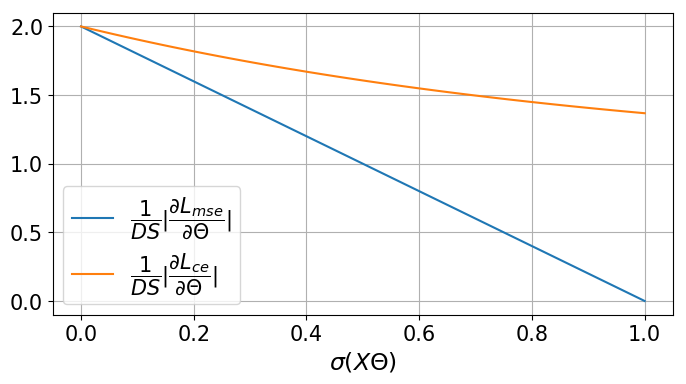

In [6]:
plot_div_mse_ce()

Как видим из графика, абсолютное значение производной функции ошибки *cross entropy* больше, чем у *MSE*.

*Cross entropy*  сильнее штрафует при градиентном спуске за неправильный ответ, поэтому лучше обновляет веса.

Если переобозначить метку класса 0 за -1, то кросс-энтропия примит знакомый нам вид:
\begin{equation*}
\tilde L = \sum_{i=1}^N ln(1 + e^{-y_i \cdot X_i\Theta})
\end{equation*}

Оптимизируя кросс энтропию, мы оптимизируем логистичесскую функцию потерь.

Линейная модель, которой мы предсказываем вероятность принадлежности к классам с

логистичесской функцие потерь, называется **Логистичесская регрессия (Logistic regression)**.

Соберем все вместе и обучим *логистическую регрессию* предсказывать вид цветка Ириса

Но сначала, нам нужно научиться брать производную от *сигмоиды*
\begin{equation*}
\sigma(t) = \dfrac{1}{1+e^{-t}} \\ \\
\dfrac{d \sigma(t)}{dt} = \dfrac{e^{-t}}{(1+e^{-t})^2} = \dfrac{e^{-t}+1-1}{(1+e^{-t})^2} = \\
\dfrac{1}{1+e^{-t}} - \dfrac{1}{(1+e^{-t})^2} = \\
\sigma(t)(1-\sigma(t))\\
\dfrac{d \sigma(t)}{dt} = \sigma(t)(1-\sigma(t))
\end{equation*}

Производная функции ошибки:
\begin{equation*}
\tilde L = -\sum\limits_{i = 1}^N y_i\ln(\sigma(X_i\Theta)) + (1-y_i)\ln(1 -\sigma(X_i\Theta)) \\
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} = -\sum\limits_{i = 1}^Ny_i\dfrac{\sigma(X_i\Theta)(1-\sigma(X_i\Theta)}{\sigma(X_i\Theta)}x_{i,j} - (1-y_i)\dfrac{\sigma(X_i\Theta)(1-\sigma(X_i\Theta))}{1-\sigma(X_i\Theta)}x_{i,j} = \\
= -\sum\limits_{i = 1}^Ny_i(1-\sigma(X_i\Theta))x_{i,j} - (1-y_i)\sigma(X_i\Theta)x_{i,j} 
\end{equation*}

Интересное замечание:
* $y_i=1$, штраф равен вероятности нулевого класса
* $y_i=0$, штраф равен вероятности первого класса

Суммарная ошибка равна сумме вероятностей противоположных классов

Теперь у нас все готово для реализации *Логистичесской регресии*

Как всегда добавим единицу первым столбцом в данные

In [7]:
def create_data(X):
    X_ones = np.ones(X.shape[0])
    return np.column_stack([X_ones, X])

X_train = create_data(X)

Напишем функцию сигмоида \begin{equation*}
\sigma(x) = \dfrac{1}{1+e^{-x}}
\end{equation*}



In [8]:
def sigmoid(x):
    return 1/(1+np.e**(-x))

Зададим начальные параметры весов случайными значениями от 0 до 1:

In [9]:
Theta = np.random.random_sample(size=(X_train.shape[1],))
print(Theta)

[0.95553631 0.55424785 0.5225888 ]


Подсчет градианта:
$\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j}
= -\sum\limits_{i = 1}^Ny_i(1-\sigma(X_i\Theta))x_{i,j} - (1-y_i)\sigma(X_i\Theta)x_{i,j}$

In [10]:
def gradient_function(Theta, X, y):
    grad = np.zeros_like(Theta)
    for j in range(Theta.shape[0]):       
        grad[j] = -sum(y*(1-sigmoid(X@Theta))*X[:,j] - (1-y)*sigmoid(X@Theta)*X[:,j])
    return grad

Градиентный спуск: 

$\theta_{j_{new}} = \theta_j - \alpha \dfrac{\partial \tilde L(\Theta)}{\partial \theta_j}$  
$\theta_{j_{new}} = \theta_j - \alpha (-\sum\limits_{i = 1}^Ny_i(1-\sigma(X_i\Theta))x_{i,j} - (1-y_i)\sigma(X_i\Theta)x_{i,j})$

In [11]:
def gradient_descent(Theta, X, y, alpha, iters):        
    theta = Theta
    for i in range (iters):
        theta = theta - alpha * gradient_function(theta, X, y)
    return theta

In [12]:
theta_opt = gradient_descent(Theta, X_train, y, 0.001, 1000)
theta_opt

array([-0.42741204,  2.90951814, -5.05197396])

In [13]:
def predict_function(X_train, theta):
    y_pred = np.dot(X_train, theta) #X @ Theta
    return sigmoid(y_pred)

y_pred = predict_function(X_train, theta_opt)
y_pred

array([0.03658738, 0.20970658, 0.0512226 , 0.06269378, 0.01684145,
       0.01190627, 0.01448087, 0.04493627, 0.09310856, 0.13801299,
       0.03203652, 0.02561979, 0.16552966, 0.04425994, 0.02275166,
       0.00230161, 0.01190627, 0.03658738, 0.04562244, 0.00827366,
       0.13093402, 0.01363787, 0.00532113, 0.09445756, 0.02561979,
       0.26197218, 0.04493627, 0.04834561, 0.07765602, 0.0512226 ,
       0.10689623, 0.13093402, 0.00244561, 0.00352848, 0.13801299,
       0.1144432 , 0.10842111, 0.01264361, 0.05833463, 0.0592127 ,
       0.02760594, 0.73998287, 0.02205641, 0.02760594, 0.00827366,
       0.16552966, 0.00827366, 0.03879318, 0.02414423, 0.07233682,
       0.77400023, 0.94307781, 0.99378308, 0.96273874, 0.96539483,
       0.99854167, 0.76839881, 0.99789503, 0.99840044, 0.91165503,
       0.91036822, 0.98957609, 0.98524618, 0.97144372, 0.90906454,
       0.88362216, 0.96539483, 0.94149609, 0.99985531, 0.99730955,
       0.9701697 , 0.84817552, 0.99960267, 0.98610485, 0.91643

Давайте опять посмотрим на долю неверных ответов, но теперь нам нужен порог $p_0$, преодалев который мы будем считать, что классификатор присвоил объект к классу $1$.

In [14]:
def error(y, y_pred, p=0.5):
    return np.mean((y_pred > p).astype(int) != y)

In [15]:
P = np.linspace(0,1,11)
for p in P:
    p = round(p,1)
    err = error(y, y_pred, p=p)
    print("Порог = {}, доля неверных ответов = {}".format(p, err))

Порог = 0.0, доля неверных ответов = 0.5
Порог = 0.1, доля неверных ответов = 0.12
Порог = 0.2, доля неверных ответов = 0.03
Порог = 0.3, доля неверных ответов = 0.01
Порог = 0.4, доля неверных ответов = 0.01
Порог = 0.5, доля неверных ответов = 0.01
Порог = 0.6, доля неверных ответов = 0.01
Порог = 0.7, доля неверных ответов = 0.03
Порог = 0.8, доля неверных ответов = 0.04
Порог = 0.9, доля неверных ответов = 0.09
Порог = 1.0, доля неверных ответов = 0.5


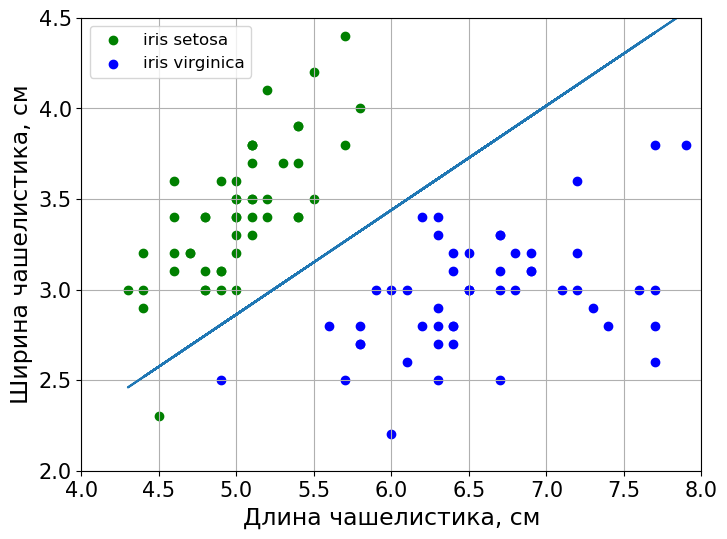

In [16]:
plot_finaly_trained_model(X, kind_iris, theta_opt)

Чтобы всякий раз не писать градиентный спуск в ручную, логистичесская регрессия есть в библиотеке scikit-learn

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression()
clf.fit(X,y)
y_pred_sklearn = clf.predict(X)
y_pred_sklearn

/Users/baduk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Метод predict возвращает метки классов по порогу 0.5, чтобы получить вероятности классов, нужно вызвать метод predict_proba

In [19]:
y_pred_prob_sklearn = clf.predict_proba(X)
y_pred_prob_sklearn

array([[0.9120516 , 0.0879484 ],
       [0.73158284, 0.26841716],
       [0.89454863, 0.10545137],
       [0.88075254, 0.11924746],
       [0.94817404, 0.05182596],
       [0.95720203, 0.04279797],
       [0.95516381, 0.04483619],
       [0.90029017, 0.09970983],
       [0.848462  , 0.151538  ],
       [0.79507057, 0.20492943],
       [0.91692865, 0.08307135],
       [0.93274622, 0.06725378],
       [0.77158306, 0.22841694],
       [0.90806962, 0.09193038],
       [0.93100346, 0.06899654],
       [0.98564501, 0.01435499],
       [0.95720203, 0.04279797],
       [0.9120516 , 0.0879484 ],
       [0.89193074, 0.10806926],
       [0.96764941, 0.03235059],
       [0.79282498, 0.20717502],
       [0.95457226, 0.04542774],
       [0.97735833, 0.02264167],
       [0.83654631, 0.16345369],
       [0.93274622, 0.06725378],
       [0.6874156 , 0.3125844 ],
       [0.90029017, 0.09970983],
       [0.89324675, 0.10675325],
       [0.85461252, 0.14538748],
       [0.89454863, 0.10545137],
       [0.

Так как классификация бинарная, первым столбцом predict_proba вернул вероятность нулевого класса, а вторым вероятность первого

Параметры модели $\Theta$ хранятся в поле intercept_ ($\theta_0$) и coef_ ($\theta_1, \theta_2$)

In [20]:
print(clf.intercept_, clf.coef_)

[-0.92533091] [[ 2.1460357  -3.53097071]]


### Вывод
1. Помимо предсказания метки класса, мы научились оценивать уверенность такого предсказания, как вероятность принадлежности первому классу:
\begin{equation*}
P(y=1|X) = \sigma(X\Theta), \\
P(y=0|X) = 1 - \sigma(X\Theta).
\end{equation*}
2. Решение о том, относим мы объект к классу $1$ принимается по заданному порогу $p_0$, если ответ классифкатора $\tilde p(X)=\sigma(X\Theta) > p_0$, ставим метку класса $1$, иначе $0$
3. Для обучения классификатора мы выбрали функцию ошибки *cross entropy*, т.к ее градиент лучше обновляет веса в задаче классификации.